### <b>Aritificial Neural Network - Regression</b>

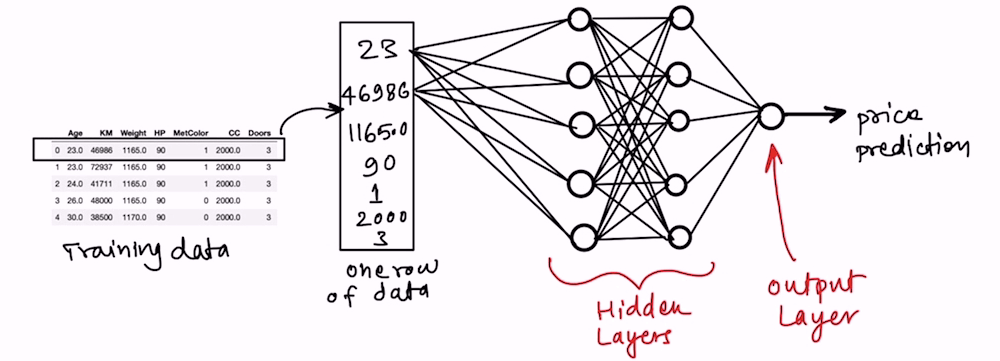
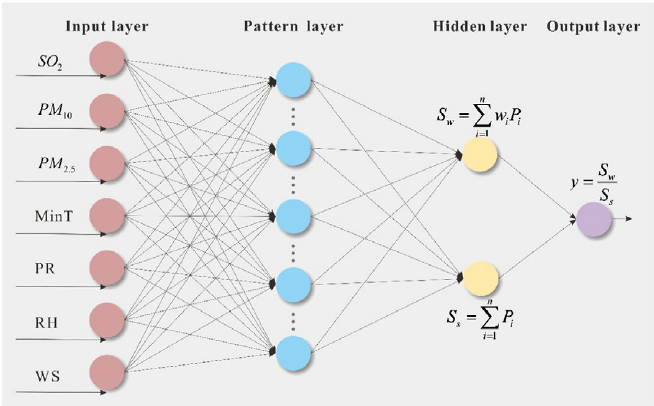

#### <b> 1. Importing/loading libraries</b>

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### <b>2. Data preprocessing</b>

In [15]:
dataset = pd.read_excel("Folds5x2_pp.xlsx")

print(f"Dataset: \n{dataset}\n")

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Dataset: 
         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

Description: 
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%     

#### <b>3. Fitting/creating ANN model</b>

##### <b> 3.1 Creating ANN model</b>

In [16]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu")) # First hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu")) # Second hidden layer
ann.add(tf.keras.layers.Dense(units = 1)) # Third hidden layer / output layer

In [21]:
ann.compile(optimizer = "adam", loss = "mean_squared_error")
ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

#### <b> 3.2 Fitting ANN regression model</b>

In [18]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 8346.7100
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 250.9265
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 239.2439
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 225.7372
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 204.0408
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 185.0464
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 163.3193
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 142.8505
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 123.1812
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 102.1571
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86.6515
Epoch 12/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 69.6024
Epoch 13/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 57.8051
Epoch 14/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 

### <b>4. Visualizing results</b>

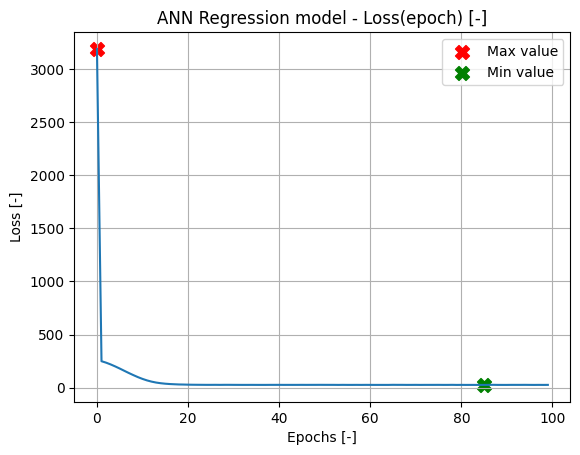

In [19]:
max_value = np.max(history.history['loss'])
max_value_index = np.argmax(history.history['loss'])
min_value = np.min(history.history['loss'])
min_value_index = np.argmin(history.history['loss'])

plt.plot(history.history['loss'])
plt.scatter(max_value_index, max_value, color="red", marker="X", s=100, label="Max value")
plt.scatter(min_value_index, min_value, color="green", marker="X", s=100, label="Min value")
plt.xlabel("Epochs [-]")
plt.ylabel("Loss [-]")
plt.title("ANN Regression model - Loss(epoch) [-]")
plt.legend()
plt.grid(True)

In [20]:
y_predicted = ann.predict(X_test)

np.set_printoptions(precision = 2)
connected = np.concatenate((y_predicted.reshape(len(y_predicted), 1), y_test.reshape(len(y_test), 1)), 1)

print(f"Concatenated results: \n{connected}\n")

prediction = ann.predict(np.array([
    [29.74, 56.9, 1007.15 ,41.91]
]))

print(f"Prediction: \n{prediction}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Concatenated results: 
[[477.18 484.67]
 [476.06 465.36]
 [428.4  434.32]
 ...
 [460.88 463.33]
 [447.35 441.41]
 [442.22 434.11]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: 
[[437.08]]
